_<h1 style="text-align: center;">Chapter III: Volatility Analysis</h1>_

<br>

As we saw in the previous chapter: FAAN(N)G stocks, and the tech sector, by proxy, seem to exhibit a greater degree of volatility than the S&P $5005$. It is worthwhile to examine this more closely to better inform investment decisions. That is exactly what we will do in this chapter.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


The returns for FAANG companies and the S&P 500 are as follows:              Facebook    Amazon     Apple   Netflix    Google    NVIDIA  \
Date                                                                     
2012-05-21 -0.109861  0.019921  0.058260  0.025443  0.022835  0.017384   
2012-05-22 -0.089039 -0.012746 -0.007679 -0.056175 -0.021674 -0.012205   
2012-05-23  0.032258  0.009056  0.024400  0.062029  0.014414  0.024712   
2012-05-24  0.032187 -0.009389 -0.009183 -0.022806 -0.009516 -0.026527   
2012-05-25 -0.033908 -0.010918 -0.005360 -0.000711 -0.020094  0.023947   
...              ...       ...       ...       ...       ...       ...   
2024-09-24 -0.001913  0.000413  0.003974  0.023945  0.002718  0.039652   
2024-09-25  0.008840 -0.007373 -0.004398 -0.000969 -0.004929  0.021842   
2024-09-26 -0.000827 -0.007116  0.005080 -0.014039  0.007678  0.004291   
2024-09-27 -0.000845 -0.016688  0.001187 -0.005735  0.007497 -0.021283   
2024-09-30  0.008954 -0.008725  0.022872  0.002

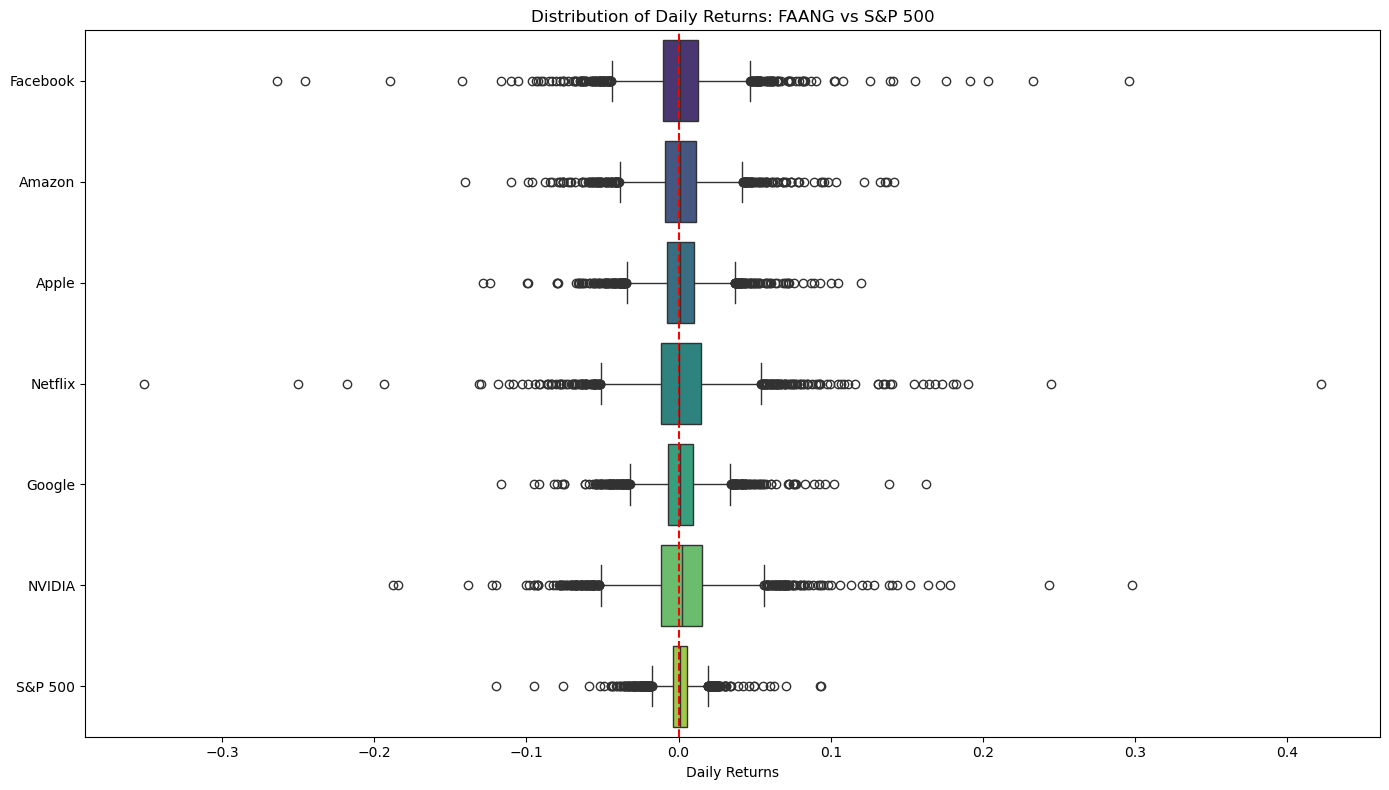

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import yfinance as yf
import matplotlib.dates as mdates

def data_fetcher(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Set date range
start_date = '2000-01-01'
end_date = '2024-10-01'

# List of FAANg companies and their tickers
tech_companies = {
    'Facebook': 'META',
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Netflix': 'NFLX',
    'Google': 'GOOGL',
    'NVIDIA': 'NVDA',
    }

# Download data
faang = pd.DataFrame()
for company, ticker in tech_companies.items():
    faang[company] = data_fetcher(ticker, start_date, end_date)
faang['S&P 500'] = data_fetcher('^GSPC', start_date, end_date)

# Calculate daily returns
returns = faang.pct_change().dropna()

# Define rolling window size (1 year = 252 trading days)
rolling_window = 252

# Calulcate the rolling volatility (annualized) for each company and the S&P 500
annualized_volatility = returns.rolling(window=rolling_window).std() * np.sqrt(252)

print("The returns for FAANG companies and the S&P 500 are as follows: ", returns)
print("The annualized volatility of FAANG companies and the S&P 500 is as follows: ", annualized_volatility)

# Create a box plot
plt.figure(figsize=(14,8))
sns.boxplot(data=returns, orient='h', palette='viridis')
plt.title('Distribution of Daily Returns: FAANG vs S&P 500')
plt.xlabel('Daily Returns')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

The table and plot above confirms our thought that the tech sector is quite a bit more volatile than the market more generally. We can see the tech sector regularly reaching annualized volatilities above $0.2$ and sometimes as high as $0.5$ (NVIDIA) which we can see visually from the box plot. The boxes are much wider for the tech sector and the data points distributed with much more dispersion. Conversely, the S&P $500$ exhibits very low annualized volatility, with a much narrower distribution of daily returns. Furthermore, the daily returns for the tech sector are consistently higher than the S&P $500$ confirming our hypothesis that the tech sector is performing better than the S&P $500$, however is much less robust, riskier and more sensitive to variable market conditions.